In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# Implement the linear regression using gradient descent by only numpy
class LinearRegression:
	
	def __init__(self):
		self.epoch = []
		self.train_loss = []
		self.weights = None

	def fit(self, x, y, lr=0.001, epochs=100, batch_size=1):
		sample_size = x.shape[0]
		feature_size = x.shape[1]
		self.weights = np.array([1 for _ in range(feature_size)],dtype=np.float64)
		interval = len(x)//batch_size
		for epoch in range(epochs):
			y_predicted = []
			for batch_num in range(len(x)//batch_size):
				if batch_num != interval - 1:
					x_subset = x[(batch_num*batch_size):(batch_num*batch_size)+batch_size,:]
					y_subset = y[(batch_num*batch_size):(batch_num*batch_size)+batch_size]
				else:
					x_subset = x[batch_num*batch_size:,:]
					y_subset = y[batch_num*batch_size:]
				prediction = np.dot(x_subset,self.weights)
				weight_delta = -(2/sample_size) * np.dot(x_subset.T,(y_subset-prediction))
				self.weights -= lr * weight_delta
				y_predicted = np.append(y_predicted, prediction)
			
			self.epoch.append(epoch)
			self.train_loss.append(self.get_loss(y_predicted, y))

	def get_loss(self, y_predict, y_truth):
		size = len(y_truth)
		return np.sum(np.square(y_predict-y_truth)) / size

	def predict(self, x):
		return np.dot(x,self.weights)
				
	def evaluate(self, x, y):
		y_predicted = np.dot(x,self.weights)
		return self.get_loss(y_predicted, y)
		
	def plot_curve(self):
		plt.plot(self.epoch,self.train_loss,c="blue",label="Train MSE loss")
		plt.title("Training loss")
		plt.xlim(-10)
		plt.xlabel("Epoch")
		plt.ylabel("MSE loss")
		plt.legend()

# Load data & data pre-processing

In [3]:
df_train = pd.DataFrame(pd.read_csv("./data/regression_train.csv"))
df_val   = pd.DataFrame(pd.read_csv("./data/regression_val.csv"))
df_test  = pd.DataFrame(pd.read_csv("./data/regression_test.csv"))

In [4]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges
0,33,male,30.25,0,no,southeast,NaN
1,19,female,32.49,0,yes,northwest,NaN
2,50,male,37.07,1,no,southeast,NaN
3,41,female,32.60,3,no,southwest,NaN
4,52,female,24.86,0,no,southeast,NaN


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       938 non-null    int64  
 1   sex       938 non-null    object 
 2   bmi       938 non-null    float64
 3   children  938 non-null    int64  
 4   smoker    938 non-null    object 
 5   region    938 non-null    object 
 6   charges   938 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 51.4+ KB


In [7]:
# You may do the labelEncoder here
def region_labeling(region):
	if region == "northeast":
		return 0
	elif region == "northwest":
		return 1
	elif region == "southeast":
		return 2
	elif region == "southwest":
		return 3

df_train["sex"] = df_train["sex"].apply(lambda x: 0 if x == "female" else 1)
df_train["smoker"] = df_train["smoker"].apply(lambda x: 0 if x == "no" else 1)
df_train["region"] = df_train["region"].apply(lambda x: region_labeling(x))

df_val["sex"] = df_val["sex"].apply(lambda x: 0 if x == "female" else 1)
df_val["smoker"] = df_val["smoker"].apply(lambda x: 0 if x == "no" else 1)
df_val["region"] = df_val["region"].apply(lambda x: region_labeling(x))

df_test["sex"] = df_test["sex"].apply(lambda x: 0 if x == "female" else 1)
df_test["smoker"] = df_test["smoker"].apply(lambda x: 0 if x == "no" else 1)
df_test["region"] = df_test["region"].apply(lambda x: region_labeling(x))

# Single feature (using bmi)

In [6]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']
x_train = x_train[['bmi']]

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']
x_val = x_val[['bmi']]

x_test = df_test.drop(['charges'], axis=1)
x_test = x_test[['bmi']]

In [7]:
# You may convert data to NumPy here 
x_train = x_train.to_numpy()
x_train = np.column_stack((x_train,np.ones(x_train.shape[0])))
y_train = y_train.to_numpy()
x_val = x_val.to_numpy()
x_val = np.column_stack((x_val,np.ones(x_val.shape[0])))
y_val = y_val.to_numpy()
x_test = x_test.to_numpy()
x_test = np.column_stack((x_test,np.ones(x_test.shape[0])))

In [8]:
x_train

array([[27.9  ,  1.   ],
       [33.77 ,  1.   ],
       [33.   ,  1.   ],
       ...,
       [27.5  ,  1.   ],
       [29.735,  1.   ],
       [24.225,  1.   ]])

In [10]:
# Tune the parameters
# Refer to slide page 9
batch_size = x_train.shape[0]

lr = 0.001
epochs = 120000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

In [11]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

Intercepts:  1382.3200116194455
Weights:  [380.14141644]


In [12]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  139562065.48514828


In [13]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  136920254.36806738


In [14]:
test_pred = linear_reg.predict(x_test)

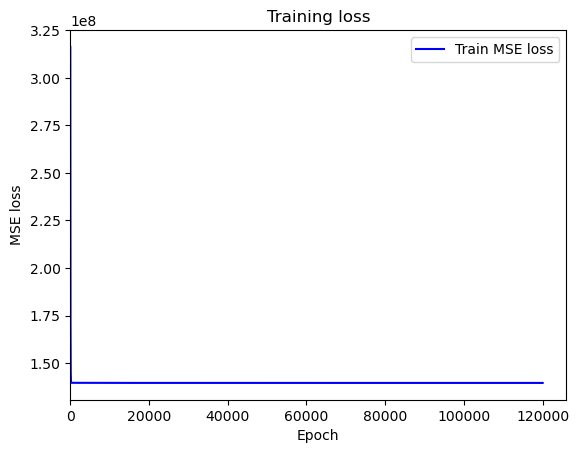

In [15]:
linear_reg.plot_curve()

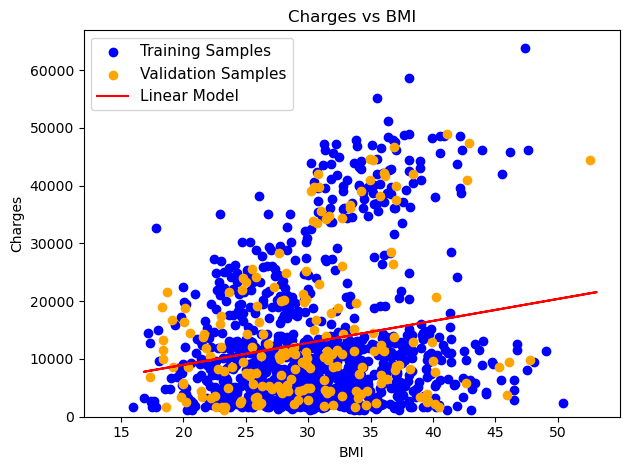

In [16]:
# Use matplotlib to plot the predicted line with the training and validation samples
fig = plt.figure()
plt.scatter([x[0] for x in x_train], y_train, c='blue',label="Training Samples")
plt.scatter([x[0] for x in x_val], y_val, c='orange',label="Validation Samples")
plt.plot([x[0] for x in x_test],test_pred,c="red",label="Linear Model")
plt.xlim(12)
plt.ylim(-2)
plt.title("Charges vs BMI")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend(facecolor='white', fontsize=11, loc="upper left")
fig.tight_layout()
plt.show()

# Multiple features

In [17]:
# Do not modify here
x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)

In [18]:
# You may convert data to NumPy here 
x_train = x_train.to_numpy()
x_train = np.column_stack((x_train,np.ones(x_train.shape[0])))
y_train = y_train.to_numpy()

x_val = x_val.to_numpy()
x_val = np.column_stack((x_val,np.ones(x_val.shape[0])))
y_val = y_val.to_numpy()

x_test = x_test.to_numpy()
x_test = np.column_stack((x_test,np.ones(x_test.shape[0])))

In [19]:
# Tune the parameters
# Refer to slide page 10
batch_size = x_train.shape[0]

lr = 0.0001
epochs = 2300000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

In [20]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

Intercepts:  -11857.032163097761
Weights:  [  259.85074642  -383.54686809   333.33194573   442.55706308
 24032.21995152  -416.01486984]


In [21]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  34697170.25353745


In [22]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  41958563.932549916


In [23]:
test_pred = linear_reg.predict(x_test)

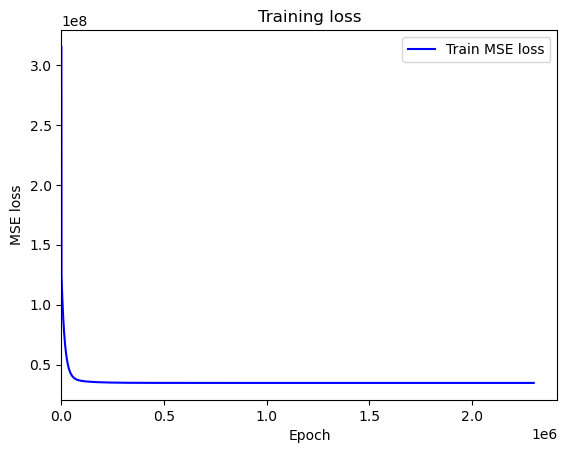

In [24]:
linear_reg.plot_curve()

# Train your own model and predict for testing data.

### Feature Analysis

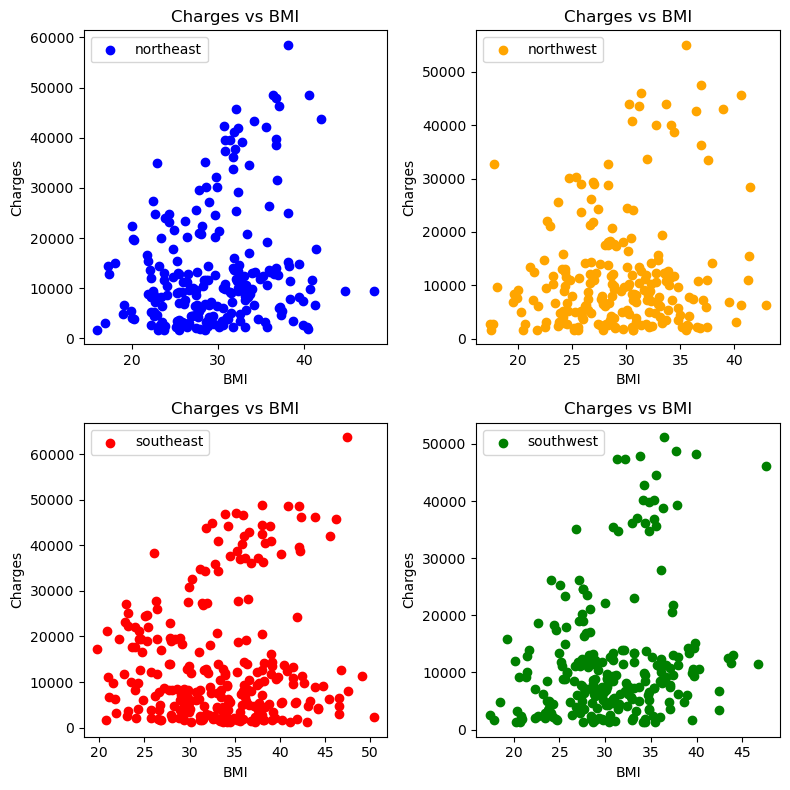

In [25]:
fig = plt.figure(figsize=(8,8))
fig.add_subplot(221)
plt.scatter(df_train[df_train['region'] == 0]['bmi'],df_train[df_train['region'] == 0]['charges'],c='blue',label="northeast")
plt.title("Charges vs BMI")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend()
fig.add_subplot(222)
plt.scatter(df_train[df_train['region'] == 1]['bmi'],df_train[df_train['region'] == 1]['charges'],c='orange',label="northwest")
plt.title("Charges vs BMI")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend()
fig.add_subplot(223)
plt.scatter(df_train[df_train['region'] == 2]['bmi'],df_train[df_train['region' ]== 2]['charges'],c='red',label="southeast")
plt.title("Charges vs BMI")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend()
fig.add_subplot(224)
plt.scatter(df_train[df_train['region'] == 3]['bmi'],df_train[df_train['region']== 3]['charges'],c='green',label="southwest")
plt.title("Charges vs BMI")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend(loc="upper left")
fig.tight_layout()
plt.show()

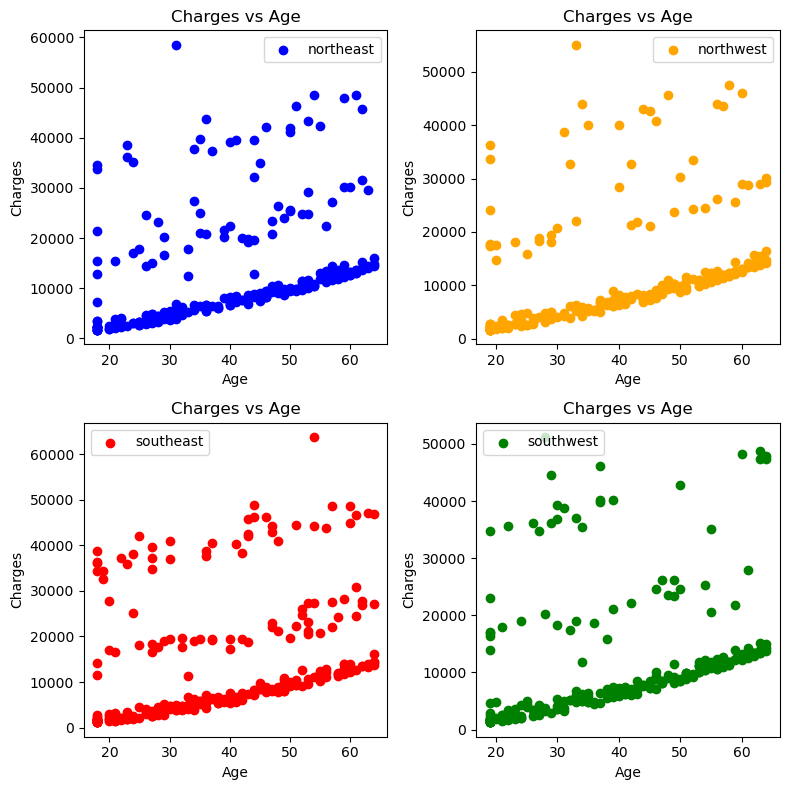

In [26]:
fig = plt.figure(figsize=(8,8))
fig.add_subplot(221)
plt.scatter(df_train[df_train['region'] == 0]['age'],df_train[df_train['region'] == 0]['charges'],c='blue',label="northeast")
plt.title("Charges vs Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
fig.add_subplot(222)
plt.scatter(df_train[df_train['region'] == 1]['age'],df_train[df_train['region'] == 1]['charges'],c='orange',label="northwest")
plt.title("Charges vs Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
fig.add_subplot(223)
plt.scatter(df_train[df_train['region'] == 2]['age'],df_train[df_train['region' ]== 2]['charges'],c='red',label="southeast")
plt.title("Charges vs Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
fig.add_subplot(224)
plt.scatter(df_train[df_train['region'] == 3]['age'],df_train[df_train['region']== 3]['charges'],c='green',label="southwest")
plt.title("Charges vs Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(loc="upper left")
fig.tight_layout()
plt.show()

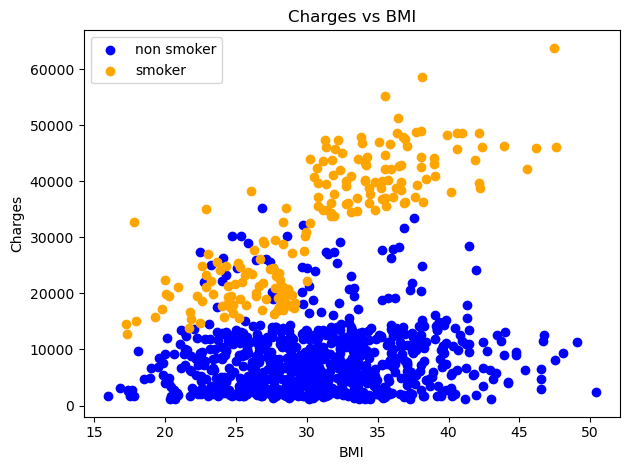

In [27]:
fig = plt.figure()
plt.scatter(df_train[df_train['smoker'] == 0]['bmi'],df_train[df_train['smoker'] == 0]['charges'],c='blue',label="non smoker")
plt.scatter(df_train[df_train['smoker'] == 1]['bmi'],df_train[df_train['smoker'] == 1]['charges'],c='orange',label="smoker")
plt.title("Charges vs BMI")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend()
fig.tight_layout()
plt.show()

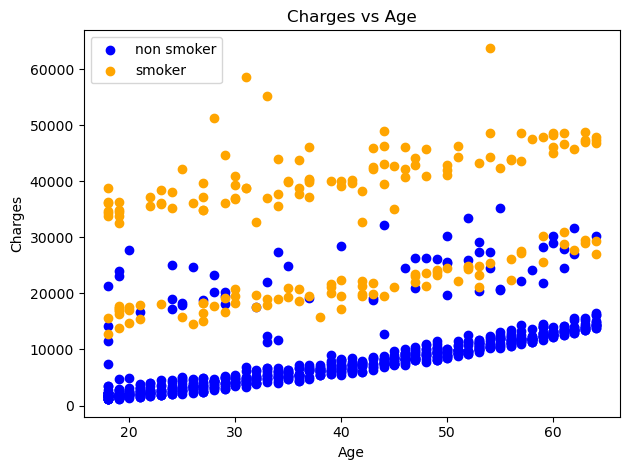

In [28]:
fig = plt.figure()
plt.scatter(df_train[df_train['smoker'] == 0]['age'],df_train[df_train['smoker'] == 0]['charges'],c='blue',label="non smoker")
plt.scatter(df_train[df_train['smoker'] == 1]['age'],df_train[df_train['smoker'] == 1]['charges'],c='orange',label="smoker")
plt.title("Charges vs Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
fig.tight_layout()
plt.show()

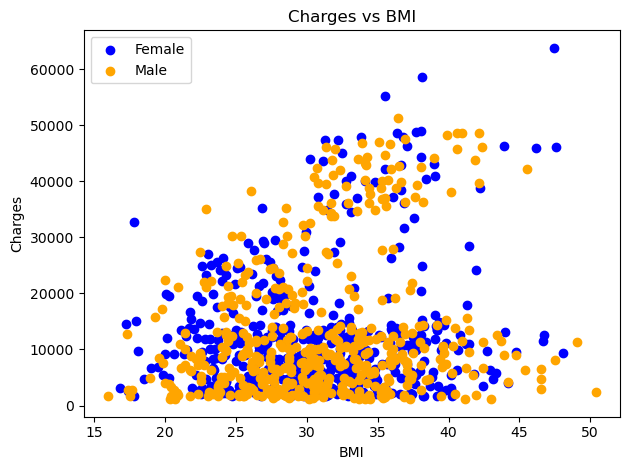

In [29]:
fig = plt.figure()
plt.scatter(df_train[df_train['sex'] == 0]['bmi'],df_train[df_train['sex'] == 0]['charges'],c='blue',label="Female")
plt.scatter(df_train[df_train['sex'] == 1]['bmi'],df_train[df_train['sex'] == 1]['charges'],c='orange',label="Male")
plt.title("Charges vs BMI")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend()
fig.tight_layout()
plt.show()

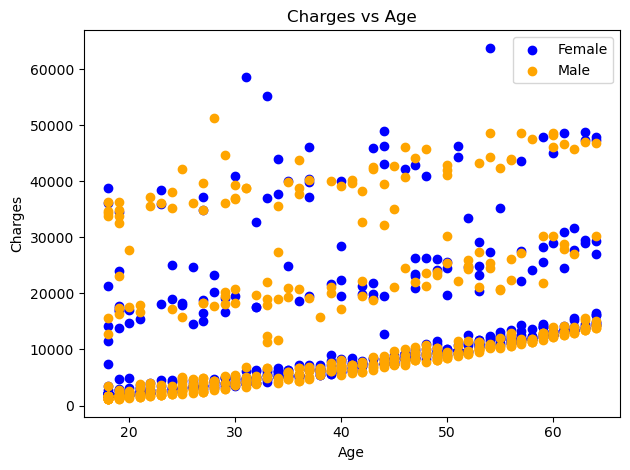

In [30]:
fig = plt.figure()
plt.scatter(df_train[df_train['sex'] == 0]['age'],df_train[df_train['sex'] == 0]['charges'],c='blue',label="Female")
plt.scatter(df_train[df_train['sex'] == 1]['age'],df_train[df_train['sex'] == 1]['charges'],c='orange',label="Male")
plt.title("Charges vs Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
fig.tight_layout()
plt.show()

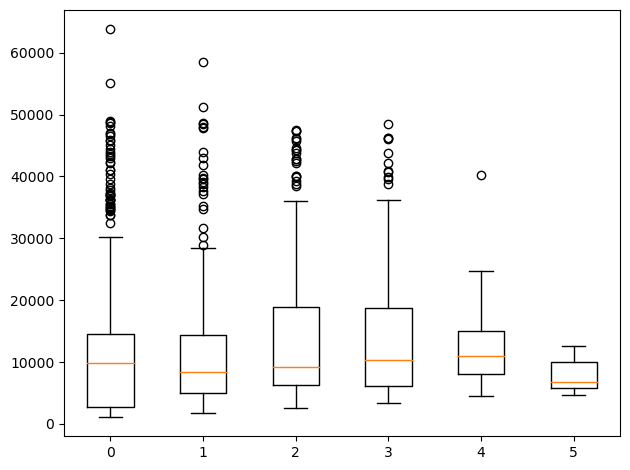

In [31]:
children_zero, children_one, children_two, children_three, children_four, children_five = df_train[df_train["children"]==0]["charges"], df_train[df_train["children"]==1]["charges"],df_train[df_train["children"]==2]["charges"],df_train[df_train["children"]==3]["charges"],df_train[df_train["children"]==4]["charges"],df_train[df_train["children"]==5]["charges"]
fig = plt.figure()
labels = ['0','1','2','3','4','5']
plt.boxplot([children_zero, children_one, children_two, children_three, children_four, children_five],labels=labels)
fig.tight_layout()
plt.show()

### Data Preprocessing

In [32]:
df_train["age"] = df_train["age"].apply(lambda x: (x-df_train["age"].min()) / (df_train["age"].max()-df_train["age"].min()))
df_train["bmi"] = df_train["bmi"].apply(lambda x: (x-df_train["bmi"].min()) / (df_train["bmi"].max()-df_train["bmi"].min()))
df_train["children"] = df_train["children"].apply(lambda x: (x-df_train["children"].min()) / (df_train["children"].max()-df_train["bmi"].min()))

df_val["age"] = df_val["age"].apply(lambda x: (x-df_val["age"].min()) / (df_val["age"].max()-df_val["age"].min()))
df_val["bmi"] = df_val["bmi"].apply(lambda x: (x-df_val["bmi"].min()) / (df_val["bmi"].max()-df_val["bmi"].min()))
df_val["children"] = df_val["children"].apply(lambda x: (x-df_val["children"].min()) / (df_val["children"].max()-df_val["children"].min()))

df_test["age"] = df_test["age"].apply(lambda x: (x-df_test["age"].min()) / (df_test["age"].max()-df_test["age"].min()))
df_test["bmi"] = df_test["bmi"].apply(lambda x: (x-df_test["bmi"].min()) / (df_test["bmi"].max()-df_test["bmi"].min()))
df_test["children"] = df_test["children"].apply(lambda x: (x-df_test["children"].min()) / (df_test["children"].max()-df_test["children"].min()))


In [33]:
df_train["bmi_smoker"] = df_train["bmi"] * df_train["smoker"]
df_train["age_smoker"] = df_train["age"] * df_train["smoker"]
df_val["bmi_smoker"] = df_val["bmi"] * df_val["smoker"]
df_val["age_smoker"] = df_val["age"] * df_val["smoker"]
df_test["bmi_smoker"] = df_test["bmi"] * df_test["smoker"]
df_test["age_smoker"] = df_test["age"] * df_test["smoker"]

### Start Training

In [34]:
x_train = df_train[['age','children','smoker','bmi_smoker','age_smoker']]
y_train = df_train['charges']

x_val = df_val[['age','children','smoker','bmi_smoker','age_smoker']]
y_val = df_val['charges']

x_test = df_test[['age','children','smoker','bmi_smoker','age_smoker']]
df_test = df_test.drop(['bmi_smoker','age_smoker'], axis=1)

x_train = x_train.to_numpy()
x_train = np.column_stack((x_train,np.ones(x_train.shape[0])))
y_train = y_train.to_numpy()

x_val = x_val.to_numpy()
x_val = np.column_stack((x_val,np.ones(x_val.shape[0])))
y_val = y_val.to_numpy()

x_test = x_test.to_numpy()
x_test = np.column_stack((x_test,np.ones(x_test.shape[0])))

In [35]:
batch_size = x_train.shape[0]

lr = 0.1
epochs = 300000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

In [36]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

Intercepts:  1934.66057073679
Weights:  [12618.52477869  2455.84583554  2562.72810548 50613.29998398
  -942.15818884]


In [37]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  21765738.6033465


In [38]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  29608893.10429289


In [39]:
test_pred = linear_reg.predict(x_test)


In [40]:
test_pred = linear_reg.predict(x_test)
print("test_pred shape: ", test_pred.shape)
assert test_pred.shape == (200,)

test_pred shape:  (200,)


# Output the csv file

In [41]:
df_test = pd.DataFrame(pd.read_csv("./data/regression_test.csv"))
df_test["charges"] = test_pred
df_test.to_csv("sample_output.csv")